# K-means clustering

## import library

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [29]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

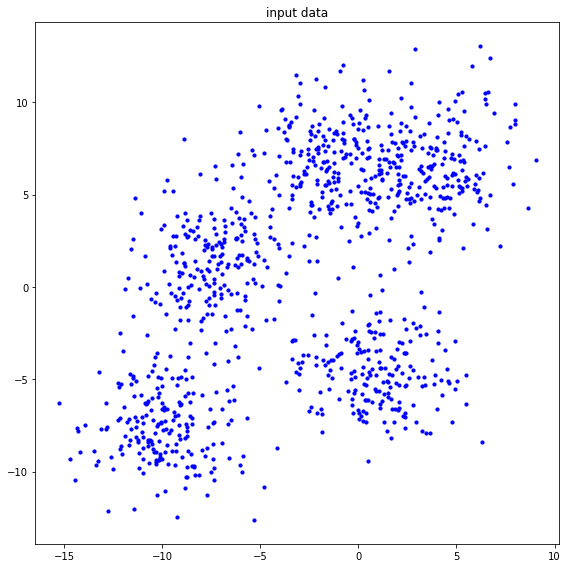

In [30]:
plt.figure(figsize=(8,8))   
plt.title('input data')
plt.scatter(x, y,s = 10, c = 'b')    

plt.tight_layout()
plt.show()

## compute distance
### feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
### $n$ : number of data, $m$ : number of features

In [31]:
def compute_distance(feature, center):
    temp1 = feature[0] - center[0]
    temp2 = feature[1] - center[1]
    distance = temp1**2 + temp2**2
    distance = np.sqrt(distance)
    return distance

## compute centroid
### feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
### $n$ : number of data, $m$ : number of features

In [48]:
def compute_centroid(feature, label_feature, value_label):
    centroid = np.zeros(2)
    num = 0
    for i in range(feature.shape[0]):
        if (label_feature[i] == value_label):
            centroid[0] += feature[i][0]
            centroid[1] += feature[i][1]
            num += 1
    
    centroid[0] = centroid[0] / num
    centroid[1] = centroid[1] / num
    return centroid

## compute label
### distance : $n \times k$, label_feature : $n \times 1$
### $n$ : number of data, $k$ : number of clusters

In [90]:
def compute_label(distance):

    mindistance = 0
    index_label_feature = np.zeros(distance.shape[0], dtype = int)
    
    for i in range(distance.shape[0]):
        mindistance = distance[i][0]
        index_label_feature[i] = 0
        for j in range(distance.shape[1]):
            if(distance[i][j] < mindistance):
                index_label_feature[i] = j
                mindistance = distance[i][j]
        
    return index_label_feature


In [91]:
# ===================================================
# assign the number of clusters and iterations
number_cluster      = 5
number_iteration    = 100
# ===================================================

In [159]:
distance            = np.zeros((number_data, number_cluster))
centroid            = np.zeros((number_cluster, number_feature))
loss_iteration      = np.zeros((number_iteration, 1))
centroid_iteration  = np.zeros((number_iteration, number_cluster, number_feature))
label_feature = np.zeros(number_data, dtype = int)
centroid = np.random.randn(number_cluster, number_feature)
centroid_iteration[0] = centroid
for i in range(number_iteration):
    for k in range(distance.shape[0]):
        for j in range(distance.shape[1]):
            distance[k][j] = compute_distance(feature[k], centroid[j])
            
    label_feature = compute_label(distance)
    
    x = 0
    for k in range(label_feature.shape[0]):
        x = label_feature[k]
        loss_iteration[i] += distance[k][x]
        
    if(i > 0):
        for j in range(number_cluster): 
            centroid[j] = compute_centroid(feature, label_feature, j)
        centroid_iteration[i] = centroid



## plot the results

In [165]:
def plot_data(feature):
    
    plt.figure(figsize=(8,8))   
    plt.title('input data')
    featureT = feature.T
    plt.scatter(featureT[0], featureT[1],s = 10, c = 'b')    

    plt.tight_layout()
    plt.show()

In [166]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))   # USE THIS VALUE for the size of the figure
    plt.title('loss')
    plt.plot(loss_iteration, '-', color = 'red')

    plt.xlabel('iteration')
    plt.ylabel('loss')
    plt.tight_layout()
    plt.show()

In [167]:

def plot_centroid(centroid_iteration):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('centroid')
    for i in range(centroid_iteration.shape[1]):
        plt.scatter(centroid_iteration[0][i][0], centroid_iteration[0][i][1],s = 20, c = 'b')
        plt.scatter(centroid_iteration[99][i][0], centroid_iteration[99][i][1],s = 20, c = 'r', marker ='s')
        temp = np.zeros((2,2))
        temp[0][0] = centroid_iteration[0][i][0]
        temp[0][1] = centroid_iteration[0][i][1]
        temp[1][0] = centroid_iteration[99][i][0]
        temp[1][1] = centroid_iteration[99][i][1]
        tempT = temp.T
        plt.plot(tempT[0],tempT[1]) 
    
    plt.tight_layout()
    plt.show()

In [168]:
def plot_cluster(feature, label_feature, label_cluster):

    plt.figure(figsize=(8,8))   # USE THIS VALUE for the size of the figure
    plt.title('cluster')
    temp = np.zeros((feature.shape[0],3))
    for i in range(feature.shape[0]):
        temp[i][0] = feature[i][0]
        temp[i][1] = feature[i][1]
        temp[i][2] = label_feature[i]
        
    
    tempT = temp.T
    scatter = plt.scatter(tempT[0],tempT[1],c = tempT[2], s=50)
                
    plt.colorbar(scatter, ticks=np.linspace(0,4,5))
    plt.tight_layout()
    plt.show()


***

# results

***

1. plot the input data

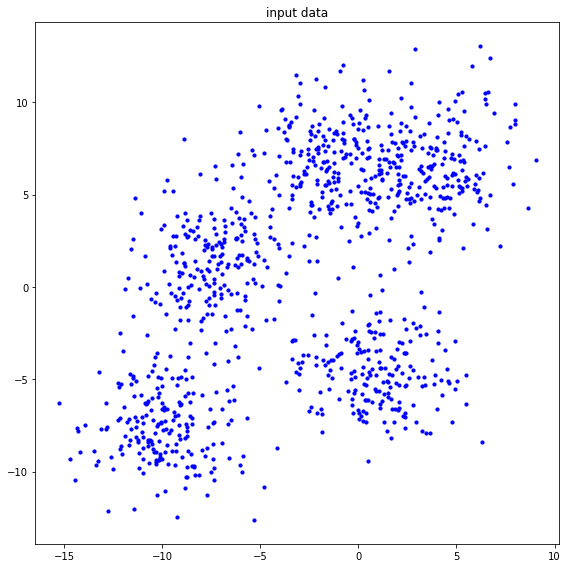

In [169]:
plot_data(feature)

***

2. plot the loss over the iterations with the number of clusters being 5

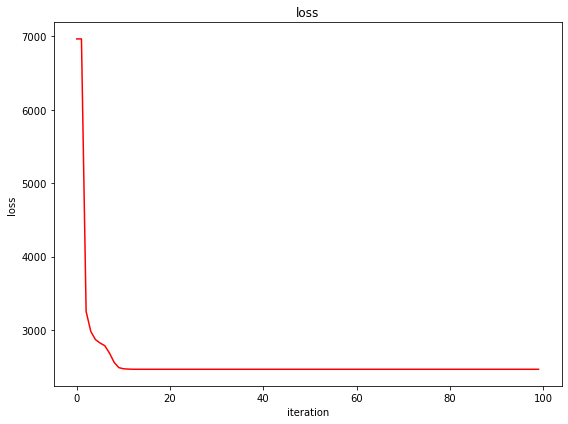

In [170]:
plot_loss_curve(loss_iteration)

***

3. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 5

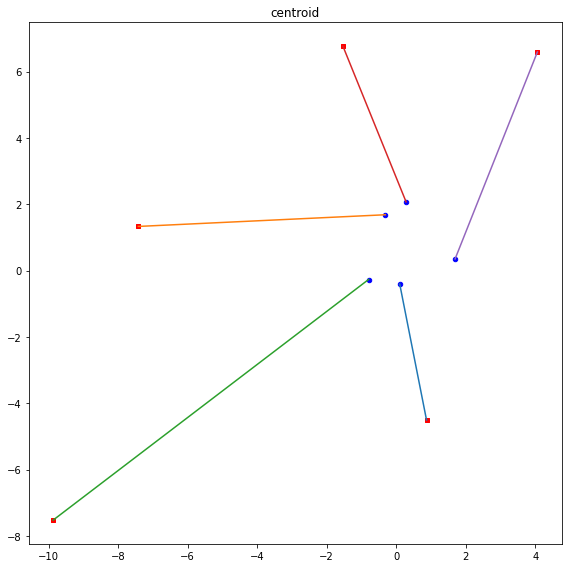

In [171]:
plot_centroid(centroid_iteration)

***

4. plot the final clustering result with the number of clusters being 5

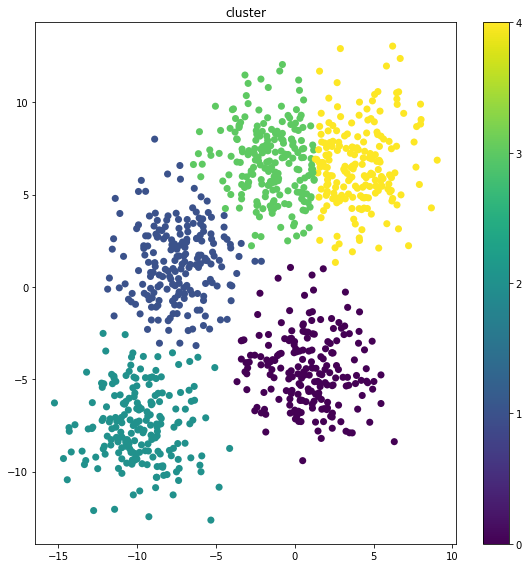

In [172]:
plot_cluster(feature, label_feature, 5)

***

5. plot the loss over the iterations with the number of clusters being 10

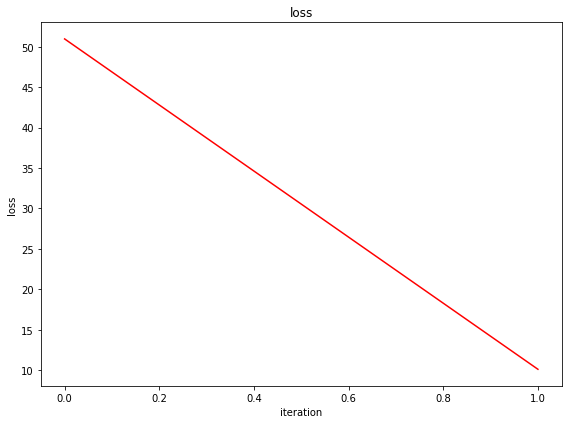

In [97]:
plot_loss_curve(loss_iteration)

***

6. plot the trajectory of the centroid for each cluster (blue circle for the initial and red square for the final) with the number of clusters being 10

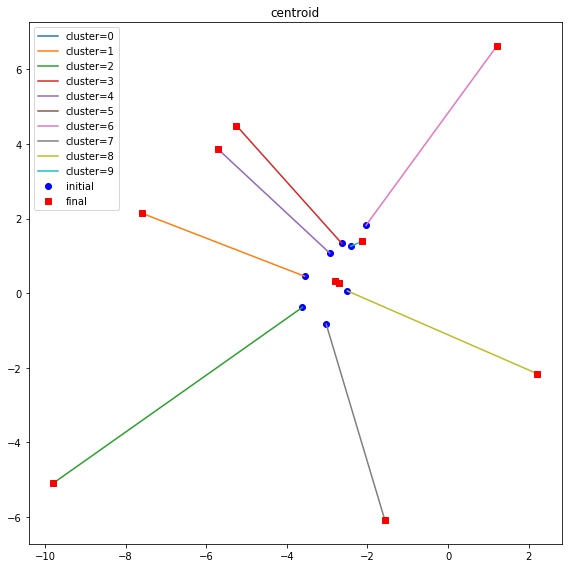

In [98]:
plot_centroid(centroid_iteration)

***

7. plot the final clustering result with the number of clusters being 10

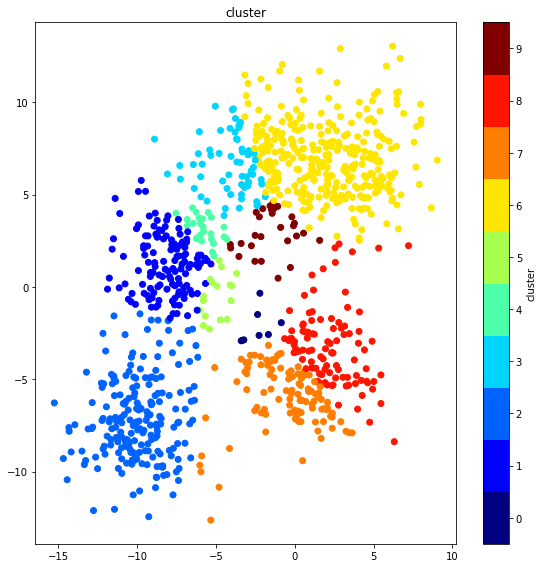

In [99]:
plot_cluster(feature, label_feature, label_cluster)

***